<a href="https://colab.research.google.com/github/nischal1728/DSA-C-/blob/main/notebookfce07237b1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Setup YOLOv8 in Colab
!pip install ultralytics roboflow

# Import libraries
from ultralytics import YOLO
import os

print("✅ YOLOv8 setup complete.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 52.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="npov6hcSEcRNj5izqQIt")
project = rf.workspace("nischal-tndcp").project("player-football-rf09n-ajrs4")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Player-+-Football-1 in yolov8:: 100%|██████████| 124/124 [00:00<00:00, 1793.57it/s]


In [7]:
import os, random, shutil

train_img_dir = '/content/Player-+-Football-1/train/images'
train_lbl_dir = '/content/Player-+-Football-1/train/labels'
val_img_dir = '/content/Player-+-Football-1/valid/images'
val_lbl_dir = '/content/Player-+-Football-1/valid/labels'

# Create validation folders
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(val_lbl_dir, exist_ok=True)

# Move 15% of training images to validation
images = os.listdir(train_img_dir)
num_val = int(0.15 * len(images))  # 15% for validation
val_images = random.sample(images, num_val)

for img in val_images:
    # move image
    shutil.move(os.path.join(train_img_dir, img), os.path.join(val_img_dir, img))

    # move matching label
    lbl = img.replace('.jpg', '.txt').replace('.png', '.txt')
    if os.path.exists(os.path.join(train_lbl_dir, lbl)):
        shutil.move(os.path.join(train_lbl_dir, lbl), os.path.join(val_lbl_dir, lbl))

print("✅ Validation set created successfully!")




✅ Validation set created successfully!


In [8]:
yaml_content = """
train: /content/Player-+-Football-1/train/images
val: /content/Player-+-Football-1/valid/images

nc: 2
names: ['player', 'ball']
"""

with open('/content/Player-+-Football-1/data.yaml', 'w') as f:
    f.write(yaml_content)

print("✅ data.yaml updated successfully!")


✅ data.yaml updated successfully!


In [10]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(
    data='/content/Player-+-Football-1/data.yaml',
    epochs=12,
    imgsz=640,
    batch=8,
    name='football_yolov8_final'
)

print("✅ Training started successfully!")


Ultralytics 8.3.227 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Player-+-Football-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=12, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=football_yolov8_final2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

In [12]:
from google.colab import files
uploaded = files.upload()  # 👈 upload your football image here


Saving child-613199_1280.jpg to child-613199_1280.jpg



image 1/1 /content/child-613199_1280.jpg: 544x640 (no detections), 208.6ms
Speed: 3.8ms preprocess, 208.6ms inference, 0.8ms postprocess per image at shape (1, 3, 544, 640)
Results saved to /content/runs/detect/predict


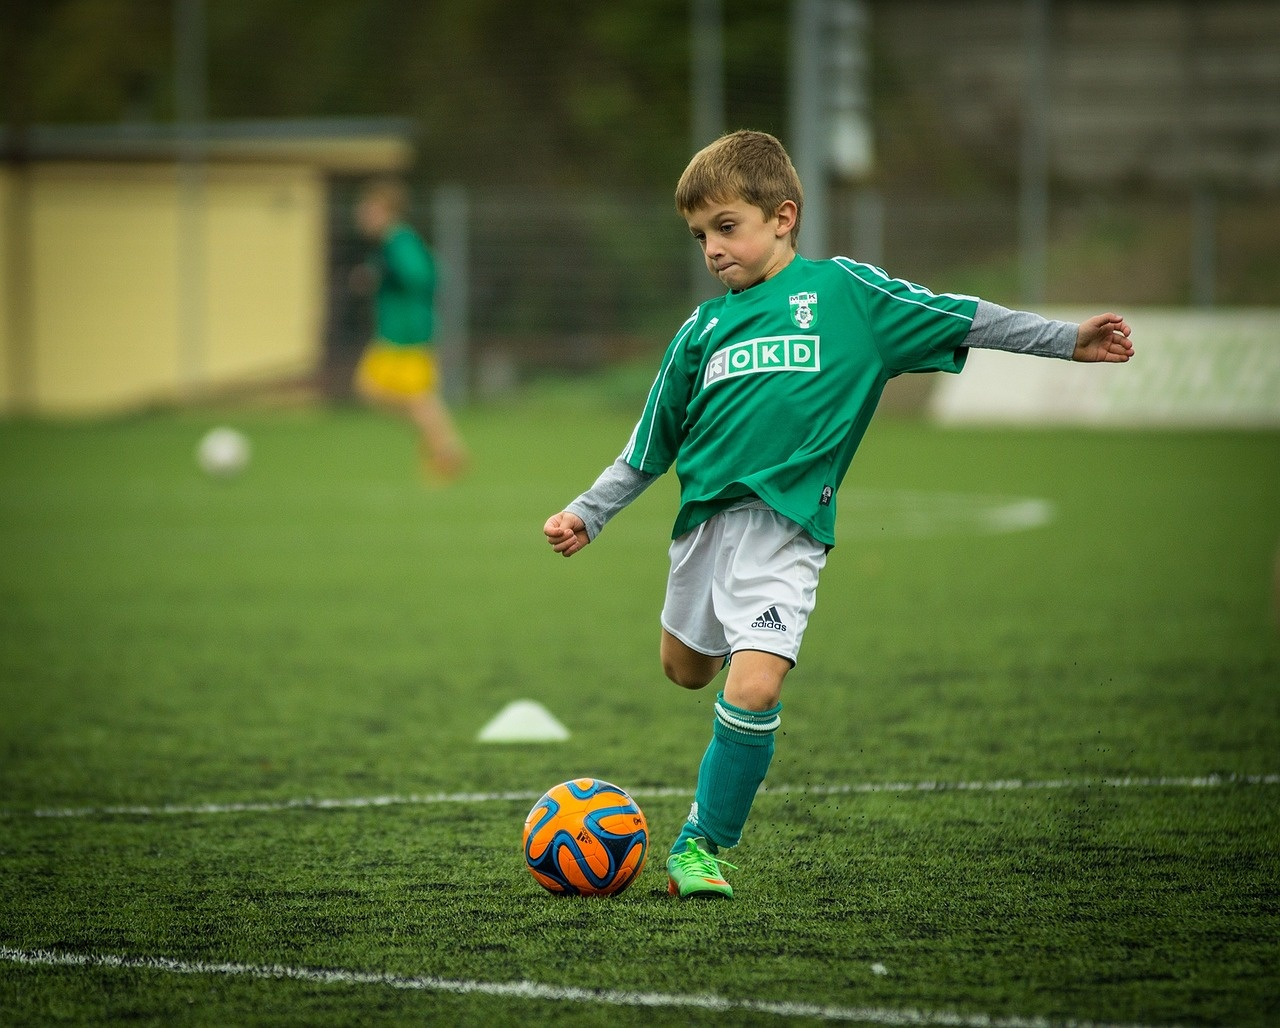

Saved to: runs/detect/predict/child-613199_1280.jpg


In [15]:
# 1) Run prediction and SAVE the result (no GUI)
results = model.predict(source='child-613199_1280.jpg', conf=0.5, save=True, show=False)

# 2) Find the saved image and display it inline
import glob, os
from IPython.display import Image, display

pred_dir = sorted(glob.glob('runs/detect/predict*'))[-1]  # latest predict folder
out_path = os.path.join(pred_dir, 'child-613199_1280.jpg')
display(Image(filename=out_path))
print("Saved to:", out_path)




image 1/1 /content/child-613199_1280.jpg: 544x640 (no detections), 199.6ms
Speed: 3.4ms preprocess, 199.6ms inference, 0.7ms postprocess per image at shape (1, 3, 544, 640)


(np.float64(-0.5), np.float64(1279.5), np.float64(1027.5), np.float64(-0.5))

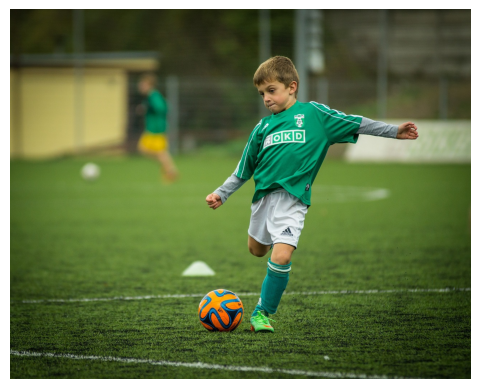

In [16]:
# Get an annotated NumPy image and show with matplotlib
import matplotlib.pyplot as plt

res = model.predict(source='child-613199_1280.jpg', conf=0.5, show=False)[0]
annotated = res.plot()  # BGR ndarray
plt.imshow(annotated[..., ::-1])  # convert BGR->RGB
plt.axis('off')


In [18]:
plt.show()


In [21]:
from google.colab import files
uploaded = files.upload()  # 👈 upload your football image here


Saving code.jpg to code.jpg



image 1/1 /content/code.jpg: 640x544 1 ball, 220.4ms
Speed: 5.3ms preprocess, 220.4ms inference, 14.4ms postprocess per image at shape (1, 3, 640, 544)
Results saved to /content/runs/detect/predict


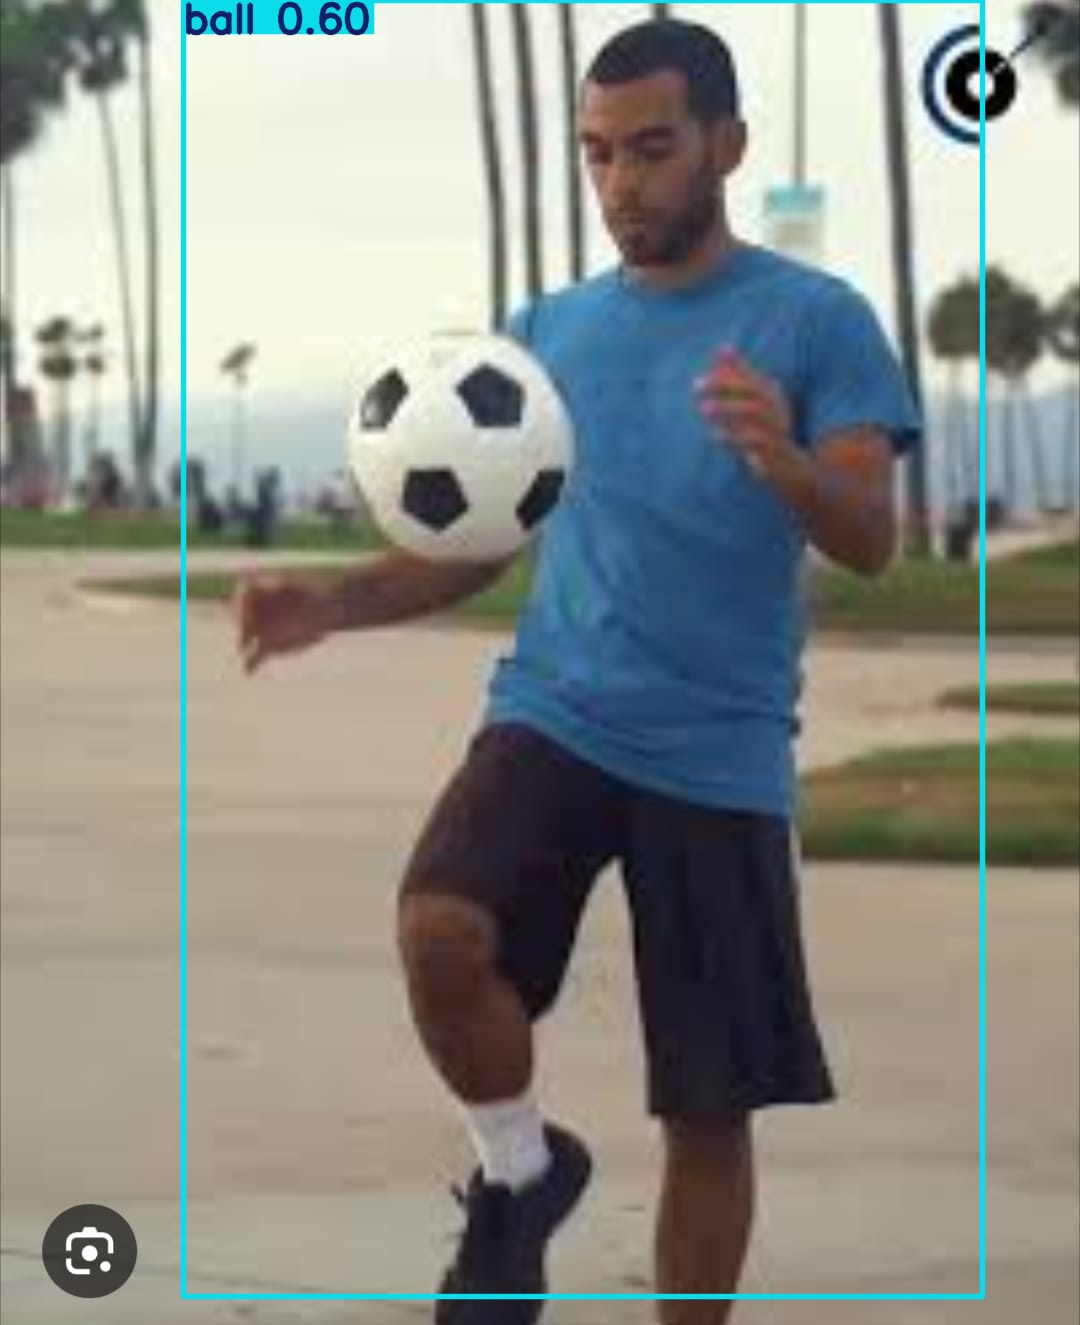

Saved to: runs/detect/predict/code.jpg


In [22]:
# 1) Run prediction and SAVE the result (no GUI)
results = model.predict(source='code.jpg', conf=0.5, save=True, show=False)

# 2) Find the saved image and display it inline
import glob, os
from IPython.display import Image, display

pred_dir = sorted(glob.glob('runs/detect/predict*'))[-1]  # latest predict folder
out_path = os.path.join(pred_dir, 'code.jpg')
display(Image(filename=out_path))
print("Saved to:", out_path)



image 1/1 /content/code.jpg: 640x544 1 ball, 201.0ms
Speed: 4.8ms preprocess, 201.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 544)


(np.float64(-0.5), np.float64(1079.5), np.float64(1324.5), np.float64(-0.5))

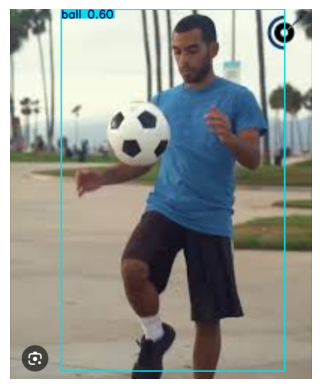

In [23]:
# Get an annotated NumPy image and show with matplotlib
import matplotlib.pyplot as plt

res = model.predict(source='code.jpg', conf=0.5, show=False)[0]
annotated = res.plot()  # BGR ndarray
plt.imshow(annotated[..., ::-1])  # convert BGR->RGB
plt.axis('off')


image 1/1 /content/code.jpg: 640x544 1 ball, 184.2ms
Speed: 4.1ms preprocess, 184.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 544)
✅ Detected 1 object(s): ['ball']


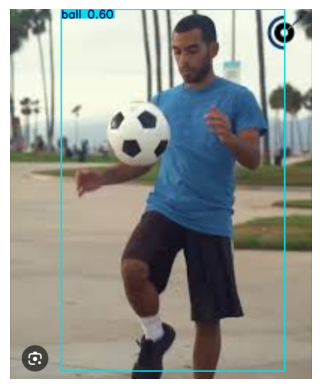

In [24]:
import matplotlib.pyplot as plt

# Run detection
res = model.predict(source='code.jpg', conf=0.25, show=False)[0]
annotated = res.plot()

# Count detections
num_detections = len(res.boxes)

# Print result message
if num_detections > 0:
    print(f"✅ Detected {num_detections} object(s): {[model.names[int(cls)] for cls in res.boxes.cls]}")
else:
    print("❌ No objects detected in this image.")

# Show image
plt.imshow(annotated[..., ::-1])
plt.axis('off')
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()  # 👈 upload your football image here

In [26]:
from google.colab import files
uploaded = files.upload()  # e.g., 'football_clip.mp4'


Saving HIGHLIGHTS _ Doku Dismantles Liverpool _ Man City 3-0 Liverpool.mp4 to HIGHLIGHTS _ Doku Dismantles Liverpool _ Man City 3-0 Liverpool.mp4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')